## CV Assignment - TASK 1

### Import packages

In [65]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.utils import shuffle
from skimage import color
from skimage.feature import hog
from skimage import data, exposure
import cv2
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import joblib

%matplotlib inline

### Setting directory for dataset

In [2]:
base_dir = 'INRIA_Dataset_Samples'

Train_dir = os.path.join(base_dir, 'Train')
Test_dir = os.path.join(base_dir, 'Test')

# Directory with our training neg pictures
train_neg_dir = os.path.join(Train_dir, 'neg')

# Directory with our training pos pictures
train_pos_dir = os.path.join(Train_dir, 'pos')

# Directory with our testing neg pictures
test_neg_dir = os.path.join(Test_dir, 'neg')

# Directory with our testing pos pictures
test_pos_dir = os.path.join(Test_dir, 'pos')

### Checking File names of some images in directory

In [3]:
train_neg_fnames = os.listdir(train_neg_dir)
print(train_neg_fnames[:10])

print()

train_pos_fnames = os.listdir(train_pos_dir)
train_pos_fnames.sort()
print(train_pos_fnames[:10])

print()

test_neg_fnames = os.listdir(test_neg_dir)
print(test_neg_fnames[:10])

print()

test_pos_fnames = os.listdir(test_pos_dir)
test_pos_fnames.sort()
print(test_pos_fnames[:10])

['00000002a.png', '00000003a.png', '00000004a.png', '00000005a.png', '00000006a.png', '00000010a.png', '00000011a.png', '00000012a.png', '00000014a.png', '00000015a.png']

['crop001001a.png', 'crop001001b.png', 'crop001001c.png', 'crop001001d.png', 'crop001001e.png', 'crop001001f.png', 'crop001002a.png', 'crop001002b.png', 'crop001002c.png', 'crop001002d.png']

['00001147.png', '00001148.png', '00001149.png', '00001150.png', '00001153.png', '00001154.png', '00001155.png', '00001156.png', '00001157.png', '00001158.png']

['crop001501a.png', 'crop001501b.png', 'crop001501c.png', 'crop001501d.png', 'crop001501e.png', 'crop001501f.png', 'crop001501g.png', 'crop001501h.png', 'crop001504a.png', 'crop001504b.png']


### Checking Size of the dataset

In [4]:
print('total training neg images:', len(os.listdir(train_neg_dir)))
print('total training pos images:', len(os.listdir(train_pos_dir)))
print('total testing neg images:', len(os.listdir(test_neg_dir)))
print('total testing pos images:', len(os.listdir(test_pos_dir)))

total training neg images: 1218
total training pos images: 2416
total testing neg images: 453
total testing pos images: 1132


### Loading and viewing - 8 Negative Class images and 8 Positive Class images

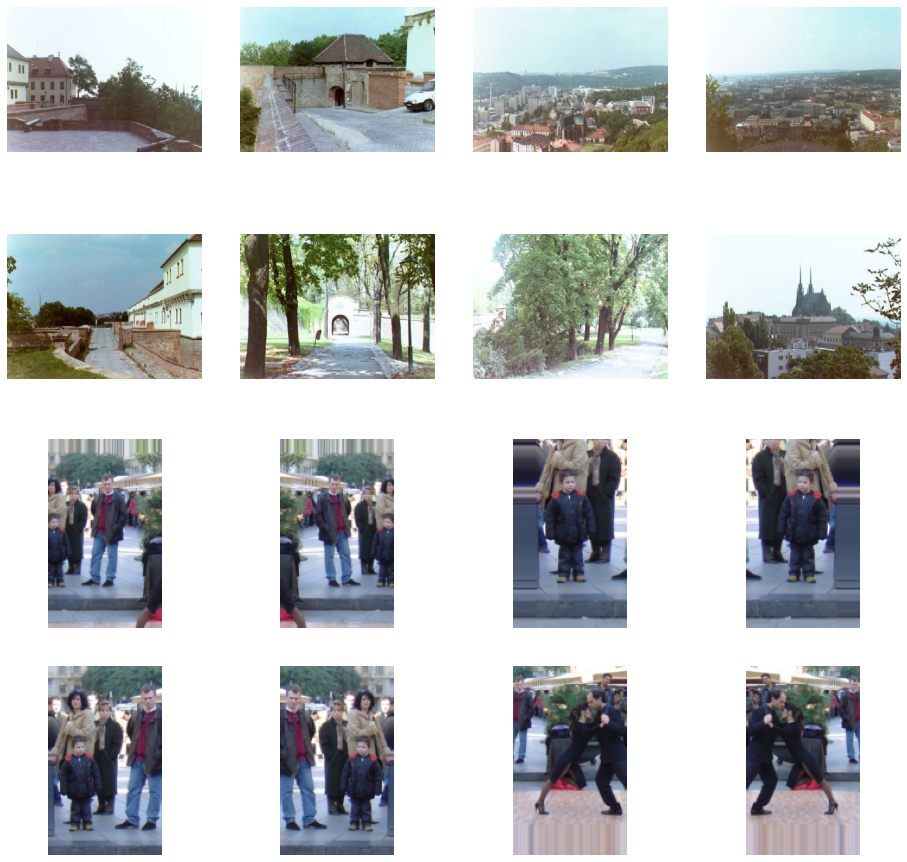

In [5]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_neg_pix = [os.path.join(train_neg_dir, fname) 
                for fname in train_neg_fnames[pic_index-8:pic_index]]
next_pos_pix = [os.path.join(train_pos_dir, fname) 
                for fname in train_pos_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_neg_pix+next_pos_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


### Loading all the images using Filenames and address

In [6]:
## Making list of Files and address

#Train negative Class 
pic_index = 0
pic_index += len(os.listdir(train_neg_dir))
train_neg_imgpath = [os.path.join(train_neg_dir, fname) 
                for fname in train_neg_fnames[pic_index-len(os.listdir(train_neg_dir)):pic_index]]

#Train positive Class
pic_index = 0
pic_index += len(os.listdir(train_pos_dir))
train_pos_imgpath = [os.path.join(train_pos_dir, fname) 
                for fname in train_pos_fnames[pic_index-len(os.listdir(train_pos_dir)):pic_index]]

#Test negative Class 
pic_index = 0
pic_index += len(os.listdir(test_neg_dir))
test_neg_imgpath = [os.path.join(test_neg_dir, fname) 
                for fname in test_neg_fnames[pic_index-len(os.listdir(test_neg_dir)):pic_index]]

#Test positive Class
pic_index = 0
pic_index += len(os.listdir(test_pos_dir))
test_pos_imgpath = [os.path.join(test_pos_dir, fname) 
                for fname in test_pos_fnames[pic_index-len(os.listdir(test_pos_dir)):pic_index]]

In [7]:
train_neg_img=[]

variable=train_neg_imgpath
for i in range(len(variable)):
    img = mpimg.imread(variable[i])
    img = cv2.resize(img,(150,150))
    train_neg_img.append(img)
    
train_pos_img=[]

variable=train_pos_imgpath
for i in range(len(variable)):
    img = mpimg.imread(variable[i])
    img = cv2.resize(img,(150,150))
    train_pos_img.append(img)

test_neg_img=[]

variable=test_neg_imgpath
for i in range(len(variable)):
    img = mpimg.imread(variable[i])
    img = cv2.resize(img,(150,150))
    test_neg_img.append(img)

test_pos_img=[]

variable=test_pos_imgpath
for i in range(len(variable)):
    img = mpimg.imread(variable[i])
    img = cv2.resize(img,(150,150))
    test_pos_img.append(img)

### Convert data to greyscale before computering HOG features

In [8]:
train_neg_img_grey = [ color.rgb2gray(i) for i in train_neg_img]
train_pos_img_grey = [ color.rgb2gray(i) for i in train_pos_img]
test_neg_img_grey = [ color.rgb2gray(i) for i in test_neg_img]
test_pos_img_grey = [ color.rgb2gray(i) for i in test_pos_img]

<ipython-input-8-5aa25797bc14>:2: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  train_pos_img_grey = [ color.rgb2gray(i) for i in train_pos_img]
<ipython-input-8-5aa25797bc14>:4: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  test_pos_img_grey = [ color.rgb2gray(i) for i in test_pos_img]


### Computing HOG Features for each image

In [9]:
ppc = 16
hog_images_train_neg = []
hog_features_train_neg = []
for image in train_neg_img_grey:
    fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualize=True)
    hog_images_train_neg.append(hog_image)
    hog_features_train_neg.append(fd)

In [10]:
hog_images_train_pos = []
hog_features_train_pos = []
for image in train_pos_img_grey:
    fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualize=True)
    hog_images_train_pos.append(hog_image)
    hog_features_train_pos.append(fd)

In [11]:
hog_images_test_neg = []
hog_features_test_neg = []
for image in test_neg_img_grey:
    fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualize=True)
    hog_images_test_neg.append(hog_image)
    hog_features_test_neg.append(fd)

In [12]:
hog_images_test_pos = []
hog_features_test_pos = []
for image in test_pos_img_grey:
    fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualize=True)
    hog_images_test_pos.append(hog_image)
    hog_features_test_pos.append(fd)

### Visualizing HOG Image

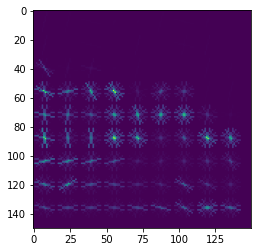

In [13]:
plt.imshow(hog_images_train_neg[0])

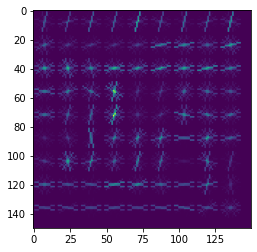

In [14]:
plt.imshow(hog_images_train_pos[0])

### Defining labels and preparing dataset for Modelling

In [15]:
#converting to pandas Dataframe
hog_features_train_neg=pd.DataFrame(hog_features_train_neg)
hog_features_train_pos=pd.DataFrame(hog_features_train_pos)
hog_features_test_neg=pd.DataFrame(hog_features_test_neg)
hog_features_test_pos=pd.DataFrame(hog_features_test_pos)

In [16]:
#Defining label
hog_features_train_neg['label']=0
hog_features_train_pos['label']=1
hog_features_test_neg['label']=0
hog_features_test_pos['label']=1

In [17]:
#train and test set 
train=pd.concat([hog_features_train_neg,hog_features_train_pos])
test=pd.concat([hog_features_test_neg,hog_features_test_pos])

In [18]:
#shuffle the datasets
train=shuffle(train,random_state=1).reset_index(drop=True)
test=shuffle(test,random_state=1).reset_index(drop=True)

In [19]:
#split into  train and test
x_train = train.drop(['label'], axis=1)
y_train = train[['label']]

x_test = test.drop(['label'], axis=1)
y_test = test[['label']]

### Training SVM

In [20]:
#svm_clf = svm.SVC()
#svm_clf.fit(x_train,y_train.values.ravel())

### Saving model

In [21]:
#svm='svm.sav'
#joblib.dump(svm_clf,svm)

### Loading Saved Model

In [22]:
svm_clf=joblib.load('svm.sav')

In [23]:
y_pred_svm = svm_clf.predict(x_test)

### Evaluting SVM

In [24]:
print("Accuracy: "+str(accuracy_score(y_test, y_pred_svm)))
print('\n')
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.9848580441640379


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       453
           1       0.99      0.99      0.99      1132

    accuracy                           0.98      1585
   macro avg       0.98      0.98      0.98      1585
weighted avg       0.98      0.98      0.98      1585



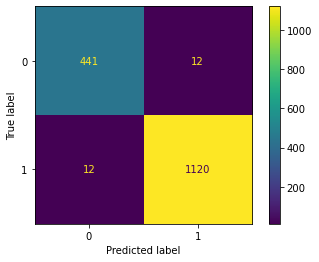

In [25]:
plot_confusion_matrix(svm_clf, x_test, y_test)  
plt.show()

### Training Random Forrest

In [26]:
# rf_clf = RandomForestClassifier()
# rf_clf.fit(x_train,y_train.values.ravel())

### Saving model

In [27]:
# rf='rf.sav'
# joblib.dump(rf_clf,rf)

### Loading Saved Model

In [28]:
rf_clf=joblib.load('rf.sav')

In [29]:
y_pred_rf = rf_clf.predict(x_test)

### Evaluating Random Forrest

In [30]:
print("Accuracy: "+str(accuracy_score(y_test, y_pred_rf)))
print('\n')
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.9640378548895899


              precision    recall  f1-score   support

           0       0.92      0.95      0.94       453
           1       0.98      0.97      0.97      1132

    accuracy                           0.96      1585
   macro avg       0.95      0.96      0.96      1585
weighted avg       0.96      0.96      0.96      1585



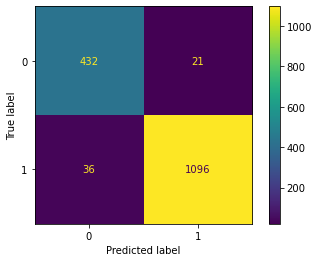

In [31]:
plot_confusion_matrix(rf_clf, x_test, y_test)  
plt.show()

### SVM Qaulitative Performance check

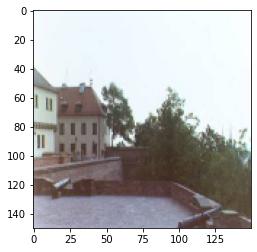

In [77]:
#original
plt.imshow(train_neg_img[0])
plt.show()

In [67]:
#predicted class
test=color.rgb2gray(train_neg_img[0])
fd,hog_image = hog(test, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualize=True)
print('Predicted Class:', svm_clf.predict(pd.DataFrame(fd).T)[0])

Predicted Class: 0


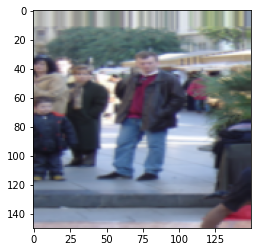

In [76]:
plt.imshow(train_pos_img[0])
plt.show()

In [69]:
#predicted class
test=color.rgb2gray(train_pos_img[0])
fd,hog_image = hog(test, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualize=True)
print('Predicted Class:', svm_clf.predict(pd.DataFrame(fd).T)[0])

Predicted Class: 1


### RF Qaulitative Performance check

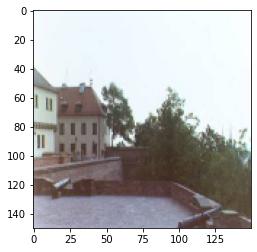

In [75]:
#original
plt.imshow(train_neg_img[0])
plt.show()

In [71]:
#predicted class
test=color.rgb2gray(train_neg_img[0])
fd,hog_image = hog(test, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualize=True)
print('Predicted Class:', svm_clf.predict(pd.DataFrame(fd).T)[0])

Predicted Class: 0


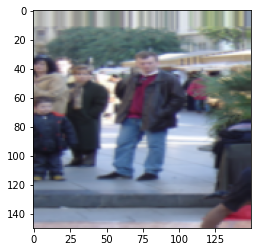

In [74]:
plt.imshow(train_pos_img[0])
plt.show()

In [73]:
#predicted class
test=color.rgb2gray(train_pos_img[0])
fd,hog_image = hog(test, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualize=True)
print('Predicted Class:', svm_clf.predict(pd.DataFrame(fd).T)[0])

Predicted Class: 1
